In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [7]:
FFMPEG_BIN = 'ffmpeg'
frame_dim = (720,1280,3)  # height x width x num_colors(depth)

In [19]:
import subprocess as sp
command = [ FFMPEG_BIN,
            '-i', 'andrew_ng_speaking_cropped.mp4',
            '-f', 'image2pipe',
            '-pix_fmt', 'rgb24',
            '-vcodec', 'rawvideo', '-']
video_pipe = sp.Popen(command, stdout = sp.PIPE, bufsize=10**8)

In [41]:
# read 1 frame bytes
raw_image = video_pipe.stdout.read(frame_dim[0]*frame_dim[1]*frame_dim[2])
print "Raw image bytes =", len(raw_image)
# transform the byte read into a numpy array
image =  np.fromstring(raw_image, dtype='uint8')
image = image.reshape(frame_dim)
# throw away the data in the pipe's buffer.
video_pipe.stdout.flush()

Raw image bytes = 2764800


In [42]:
# Crop out the verticle bars on either side.
bar=91
image = image[:,bar:frame_dim[1]-bar,:]

(720, 1098, 3)

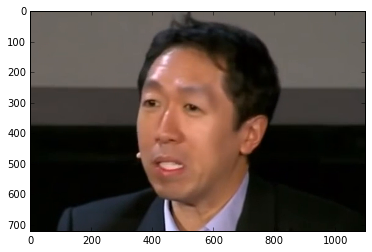

In [43]:
plt.imshow(image)
image.shape

In [44]:
# Down-scale the image.
import scipy.misc
new_shape = np.array(image.shape) / 15
new_shape[2] = 3
small_image = scipy.misc.imresize(image, new_shape)
small_image.shape

(48, 73, 3)

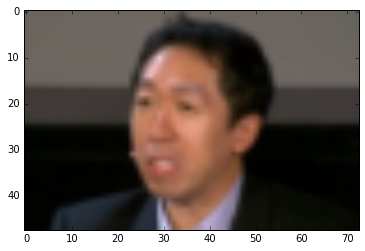

In [45]:
plt.imshow(small_image)